# Google Analytics Customer Revenue Prediction

In this competition, you’re challenged to analyze a Google Merchandise Store (also known as GStore, where Google swag is sold) customer dataset to predict revenue per customer. Hopefully, the outcome will be more actionable operational changes and a better use of marketing budgets for those companies who choose to use data analysis on top of GA data.

In [10]:
import pandas as pd
import numpy as np

In [13]:
df_train = pd.read_csv('./data/train.csv', low_memory=False)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int64 
 10  visitNumber           903653 non-null  int64 
 11  visitStartTime        903653 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


In [4]:
df_train.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [6]:
df_train.device[1]

'{"browser": "Firefox", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Macintosh", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [7]:
df_train.geoNetwork[0]

'{"continent": "Asia", "subContinent": "Western Asia", "country": "Turkey", "region": "Izmir", "metro": "(not set)", "city": "Izmir", "cityId": "not available in demo dataset", "networkDomain": "ttnet.com.tr", "latitude": "not available in demo dataset", "longitude": "not available in demo dataset", "networkLocation": "not available in demo dataset"}'

In [8]:
df_train.totals[0]

'{"visits": "1", "hits": "1", "pageviews": "1", "bounces": "1", "newVisits": "1"}'

In [9]:
df_train.trafficSource[0]

'{"campaign": "(not set)", "source": "google", "medium": "organic", "keyword": "(not provided)", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}}'

### Kaggle example
https://www.kaggle.com/ashrafkhan94/googleanalytics-customer-revenue-eda-prediction

In [5]:
### separating dictionary in columns using JSON

In [54]:
import warnings
warnings.filterwarnings('ignore')
import os
import random 


import json # to convert json in df
from pandas.io.json import json_normalize # to normalize the json file


In [7]:
columns = ['device', 'geoNetwork', 'totals', 'trafficSource'] # Columns that have json format

dir_path = "./data/"

# p is a fractional number to skiprows and read just a random sample of the our dataset. 
p = 0.07 # *** In this case we will use 50% of data set *** #

#Code to transform the json format columns in table
def json_read(df):
    #joining the [ path + df received]
    data_frame = dir_path + df
    
    #Importing the dataset
    df = pd.read_csv(data_frame, 
                     converters={column: json.loads for column in columns}, # loading the json columns properly
                     dtype={'fullVisitorId': 'str'}, # transforming this column to string
                     skiprows=lambda i: i>0 and random.random() > p)# Number of rows that will be imported randomly
    
    for column in columns: #loop to finally transform the columns in data frame
        #It will normalize and set the json to a table
        column_as_df = json_normalize(df[column]) 
        # here will be set the name using the category and subcategory of json columns
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns] 
        # after extracting the values, let drop the original columns
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        
    # Printing the shape of dataframes that was imported     
    print(f"Loaded {os.path.basename(data_frame)}. Shape: {df.shape}")
    return df 

In [59]:
# %%time 
df_train = json_read("train.csv") 

Loaded train.csv. Shape: (63359, 54)


In [12]:
pd.options.display.max_columns = 100
df_train.head(3)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,1283542838194038522,1283542838194038522_1472885255,Not Socially Engaged,1472885255,1,1472885255,Safari,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Hungary,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,broadband.hu,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,542217492398994444,542217492398994444_1472822034,Not Socially Engaged,1472822034,1,1472822034,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Western Europe,Belgium,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobistar.be,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# function to Describe each column 

In [60]:
from scipy import stats

def DataDesc(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 
    
    return summary

In [61]:
DataDesc(df_train)

Dataset Shape: (63359, 54)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,channelGrouping,object,0,8,Organic Search,Organic Search,Organic Search,2.11
1,date,int64,0,366,20160902,20160902,20160902,8.45
2,fullVisitorId,object,0,60955,1131660440785968503,1905672039242460897,3053576296023059465,15.86
3,sessionId,object,0,63355,1131660440785968503_1472830385,1905672039242460897_1472817241,3053576296023059465_1472808484,15.95
4,socialEngagementType,object,0,1,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,0.00
5,visitId,int64,0,63253,1472830385,1472817241,1472808484,15.95
6,visitNumber,int64,0,179,1,1,1,1.42
7,visitStartTime,int64,0,63256,1472830385,1472817241,1472808484,15.95
8,device.browser,object,0,29,Chrome,Chrome,Chrome,1.51
9,device.browserVersion,object,0,1,not available in demo dataset,not available in demo dataset,not available in demo dataset,0.00


- Notice there are a lot of constant columns having only one unique value
- Target column = totals.transactionRevenue (Null value = No Revenue/ Total 62847 Null Values)
- Columns with prefix trafficSource contain Null values majorly, hence we will drop these columns

In [62]:
# describing Columns with Null Values

In [63]:
def Null_Count(df):
    df_null = df.isnull().sum().sort_values(ascending = False).rename('Null').reset_index()

    null_count = df_null['Null']
    null_percent = (null_count * 100) / (df.shape[0])

    df_null = pd.concat([df_null['index'],null_count,null_percent], axis=1, keys=['Column','Null_Count','Null_Percent'])

    return df_null[df_null['Null_Count'] != 0]



Null_Count(df_train)


,Column,Null_Count,Null_Percent
0,trafficSource.adContent,62553,98.727884
1,totals.transactionRevenue,62506,98.653703
2,trafficSource.adwordsClickInfo.adNetworkType,61847,97.613599
3,trafficSource.adwordsClickInfo.slot,61847,97.613599
4,trafficSource.adwordsClickInfo.page,61847,97.613599
5,trafficSource.adwordsClickInfo.isVideoAd,61847,97.613599
6,trafficSource.adwordsClickInfo.gclId,61842,97.605707
7,trafficSource.isTrueDirect,44136,69.660190
8,trafficSource.referralPath,40047,63.206490
9,trafficSource.keyword,35260,55.651131


In [64]:
# function to fill Null Values

In [65]:
def fill_na(df):   
    df['totals.pageviews'].fillna(1, inplace=True)
    df['totals.newVisits'].fillna(0, inplace=True)
    df['totals.bounces'].fillna(0, inplace=True) 
    df["totals.transactionRevenue"].fillna(0.0, inplace=True)
    
    # Changing datatypes from object to desired ones
    df['totals.pageviews'] = df['totals.pageviews'].astype(int)
    df['totals.newVisits'] = df['totals.newVisits'].astype(int)
    df['totals.bounces'] = df['totals.bounces'].astype(int)
    df["totals.transactionRevenue"] = df["totals.transactionRevenue"].astype(float)
    
    
    df['trafficSource.isTrueDirect'].fillna(False, inplace=True) 
    df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean with True
    df[df_train['geoNetwork.city'] == "(not set)"]['geoNetwork.city'] = np.nan
    df['geoNetwork.city'].fillna("NaN", inplace=True)
    
    return df

df_train = fill_na(df_train)

In [66]:
# processing Date/Time Columns 

In [67]:
from datetime import datetime

# This function is to extract date features
def date_process(df):
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d") # seting the column as pandas datetime
    df["weekday"] = df['date'].dt.weekday #extracting week day
    df["day"] = df['date'].dt.day # extracting day
    df["month"] = df['date'].dt.month # extracting day
    df["year"] = df['date'].dt.year # extracting day
    df['visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
    
    return df

df_train = date_process(df_train)

In [68]:
#removing constant columns

In [69]:
constant_columns = [col for col in df_train.columns if df_train[col].nunique() == 1]
print(f'Columns : {constant_columns}, \n Num of Columns : {len(constant_columns)}')


df_train.drop(constant_columns, axis=1, inplace=True)


Columns : ['socialEngagementType', 'device.browserVersion', 'device.browserSize', 'device.operatingSystemVersion', 'device.mobileDeviceBranding', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.flashVersion', 'device.language', 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits', 'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.adwordsClickInfo.adNetworkType'], 
 Num of Columns : 20


In [70]:
Null_Count(df_train)

,Column,Null_Count,Null_Percent
0,trafficSource.adContent,62553,98.727884
1,trafficSource.adwordsClickInfo.slot,61847,97.613599
2,trafficSource.adwordsClickInfo.page,61847,97.613599
3,trafficSource.adwordsClickInfo.gclId,61842,97.605707
4,trafficSource.referralPath,40047,63.206490
5,trafficSource.keyword,35260,55.651131


In [71]:
#droping remaining Null columns 
df_train.drop(list(Null_Count(df_train)['Column']), axis=1,inplace=True)


In [72]:
# explore dataset after cleaning and processing

In [73]:
DataDesc(df_train)

Dataset Shape: (63359, 33)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,channelGrouping,object,0,8,Organic Search,Organic Search,Organic Search,2.11
1,date,datetime64[ns],0,366,2016-09-02 00:00:00,2016-09-02 00:00:00,2016-09-02 00:00:00,8.45
2,fullVisitorId,object,0,60955,1131660440785968503,1905672039242460897,3053576296023059465,15.86
3,sessionId,object,0,63355,1131660440785968503_1472830385,1905672039242460897_1472817241,3053576296023059465_1472808484,15.95
4,visitId,int64,0,63253,1472830385,1472817241,1472808484,15.95
5,visitNumber,int64,0,179,1,1,1,1.42
6,visitStartTime,int64,0,63256,1472830385,1472817241,1472808484,15.95
7,device.browser,object,0,29,Chrome,Chrome,Chrome,1.51
8,device.operatingSystem,object,0,14,Windows,Windows,Macintosh,2.19
9,device.isMobile,bool,0,2,False,False,False,0.83


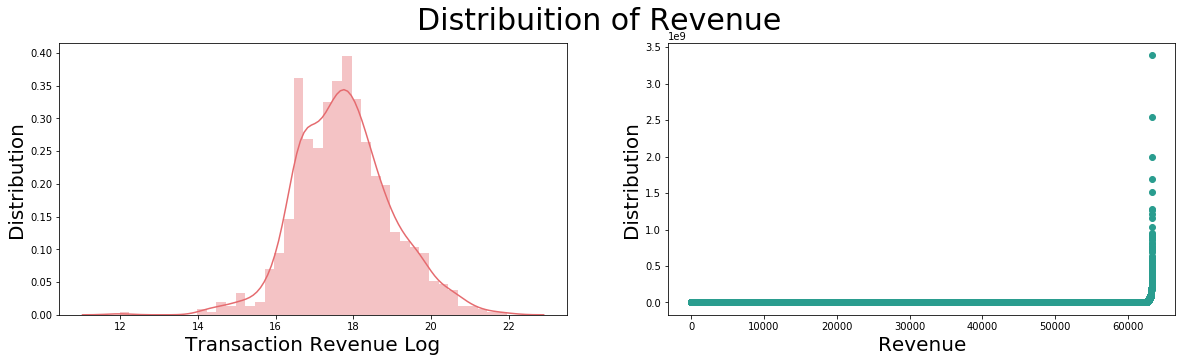

In [74]:
# exploring revenue 
import matplotlib.pyplot as plt 
import seaborn as sns 

fig = plt.figure(figsize=(20,5))
plt.suptitle('Distribuition of Revenue', fontsize=30)

ax1 = fig.add_subplot(121)
_ = sns.distplot(np.log(df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"]), bins=40,color='#e56b6f', ax=ax1)
_ = ax1.set_ylabel('Distribution', fontsize=20)
_ = ax1.set_xlabel('Transaction Revenue Log', fontsize=20)


ax2 = fig.add_subplot(122)
_ = plt.scatter(range(df_train.shape[0]), np.sort(df_train['totals.transactionRevenue'].values), color='#2a9d8f')
_ = ax2.set_ylabel('Distribution', fontsize=20)
_ = ax2.set_xlabel('Revenue', fontsize=20)

In [75]:
#Outliers

In [76]:
def CalOutliers(df_num): 

    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print(f'Lower outliers: {len(outliers_lower)}') # printing total number of values in lower cut of outliers
    print(f'Upper outliers: {len(outliers_higher)}') # printing total number of values in higher cut of outliers
    print(f'Total outliers: {len(outliers_total)}') # printing total number of values outliers of both sides
    print(f'Non - outliers: {len(outliers_removed)}') # printing total number of non outlier values
    print(f'% of Outliers : {round((len(outliers_total) / len(outliers_removed) )*100, 4)}') # Percentage of outliers in points

In [77]:
CalOutliers(df_train['totals.transactionRevenue'])


Lower outliers: 0
Upper outliers: 237
Total outliers: 237
Non - outliers: 63122
% of Outliers : 0.3755


In [78]:
#graphing

In [79]:
# Importing librarys to use on interactive graphs
import plotly.offline as plty
from plotly import tools
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly.graph_objs as go 

#revenue based on Browser / Device / Operating System 

df_train['device.browser'].value_counts()[:10].reset_index()


def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Device Browser
cnt_srs = df_train.groupby('device.browser')['totals.transactionRevenue'].agg(['size', 'sum', 'mean'])
cnt_srs.columns = ["count", "total revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), '#073b4c')
trace2 = horizontal_bar_chart(cnt_srs["total revenue"].head(10), '#073b4c')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), '#073b4c')

# Device Category
cnt_srs = df_train.groupby('device.deviceCategory')['totals.transactionRevenue'].agg(['size', 'sum', 'mean'])
cnt_srs.columns = ["count", "total revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cnt_srs["count"].head(10), '#118ab2')
trace5 = horizontal_bar_chart(cnt_srs["total revenue"].head(10), '#118ab2')
trace6 = horizontal_bar_chart(cnt_srs["mean"].head(10), '#118ab2')

# Operating system
cnt_srs = df_train.groupby('device.operatingSystem')['totals.transactionRevenue'].agg(['size', 'sum', 'mean'])
cnt_srs.columns = ["count", "total revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace7 = horizontal_bar_chart(cnt_srs["count"].head(10), '#ef476f')
trace8 = horizontal_bar_chart(cnt_srs["total revenue"].head(10),'#ef476f')
trace9 = horizontal_bar_chart(cnt_srs["mean"].head(10),'#ef476f')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=3, vertical_spacing=0.04, 
                          subplot_titles=["Device Browser - Count", "Device Browser - Total Revenue", "Device Browser - Mean Revenue",
                                          "Device Category - Count",  "Device Category - Total Revenue ", "Device Category - Mean Revenue", 
                                          "Device OS - Count", "Device OS - Total Revenue", "Device OS - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)
fig.append_trace(trace9, 3, 3)

fig['layout'].update(height=1200, width=1500, template='plotly_white',paper_bgcolor='#ffffff', title="Device Plots")
plty.iplot(fig, filename='device-plots')

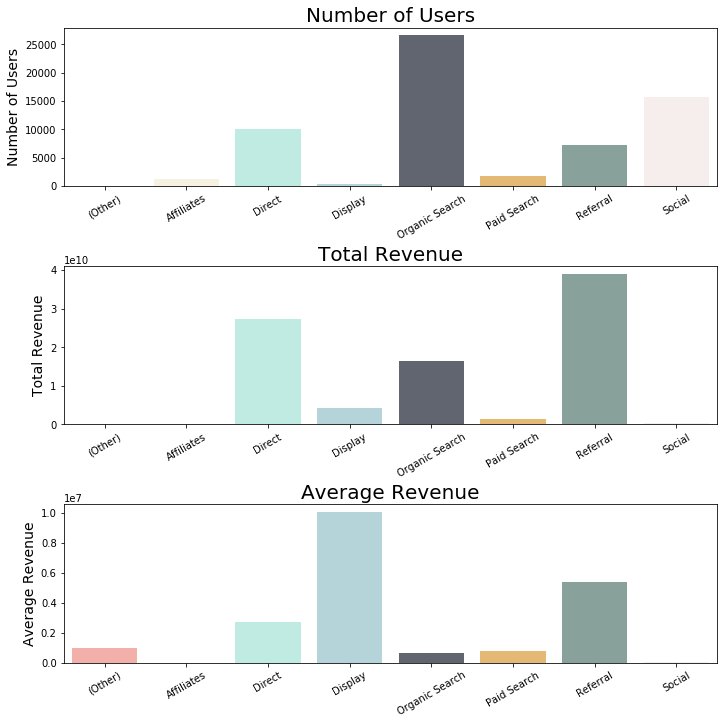

In [34]:
# Channel Groups and Their Revenue

group = df_train.groupby('channelGrouping')['totals.transactionRevenue'].agg(['count','sum','mean']).reset_index()

color = ["#ffa69e","#faf3dd","#b8f2e6","#aed9e0","#5e6472",'#f6bd60','#84a59d','#f8edeb']
customPalette = sns.set_palette(sns.color_palette(color))

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(311)
_ = sns.barplot(data=group, x='channelGrouping', y='count', palette= customPalette, ax=ax1)
xlabels = group['channelGrouping'].to_list()
ylabels = group['count']
_ = ax1.set_title('Number of Users', fontsize=20)
_ = ax1.set_ylabel('Number of Users', fontsize=14)
_ = ax1.set_xlabel('')
_ = ax1.set_xticklabels(xlabels, rotation=30, fontsize=10)

ax2 = fig.add_subplot(312)
_ = sns.barplot(data=group, x='channelGrouping', y='sum', palette= customPalette, ax=ax2)
xlabels = group['channelGrouping'].to_list()
ylabels = group['sum']
_ = ax2.set_title('Total Revenue', fontsize=20)
_ = ax2.set_ylabel('Total Revenue', fontsize=14)
_ = ax2.set_xlabel('')
_ = ax2.set_xticklabels(xlabels, rotation=30, fontsize=10)

ax3 = fig.add_subplot(313)
_ = sns.barplot(data=group, x='channelGrouping', y='mean', palette= customPalette, ax=ax3)
xlabels = group['channelGrouping'].to_list()
ylabels = group['mean']
_ = ax3.set_title('Average Revenue', fontsize=20)
_ = ax3.set_ylabel('Average Revenue', fontsize=14)
_ = ax3.set_xlabel('')
_ = ax3.set_xticklabels(xlabels, rotation=30, fontsize=10)

fig.tight_layout(pad=0.5)

In [35]:
group = df_train.groupby(['channelGrouping','device.browser']).size().rename('Count').reset_index()

group_sorted = group.groupby(['channelGrouping']).apply(lambda x: x.sort_values(['Count'], ascending=False)).reset_index(drop=True)

group_top_four = group_sorted.groupby(['channelGrouping']).head(4).sort_values(['Count'], ascending=False)

colors = ["#264653","#2a9d8f","#e9c46a","#f4a261","#e76f51",'#457b9d']
px.bar(data_frame=group_top_four,x='channelGrouping',y='Count', color='device.browser', template='plotly_white', color_discrete_sequence= colors)


In [36]:
# Which browsers are popularly used on different devices 

group = df_train.groupby(['device.operatingSystem','device.browser']).size().rename('Count').reset_index()

group_sorted = group.groupby(['device.operatingSystem']).apply(lambda x: x.sort_values(['Count'], ascending=False)).reset_index(drop=True)

group_top_four = group_sorted.groupby(['device.operatingSystem']).head(4).sort_values(['Count'], ascending=False)

colors = ["#ff9f1c","#ffbf69","#cbf3f0","#2ec4b6","#264653","#2a9d8f","#e9c46a","#f4a261","#e76f51","#e63946","#f1faee","#a8dadc","#457b9d","#1d3557"]
px.bar(data_frame=group_top_four,x='device.operatingSystem',y='Count', color='device.browser', template='plotly_white', color_discrete_sequence= colors)

In [37]:
#normalizing Transaction Revenue
df_train['totals.transactionRevenue'] = df_train['totals.transactionRevenue'].apply(lambda x: np.log1p(x))

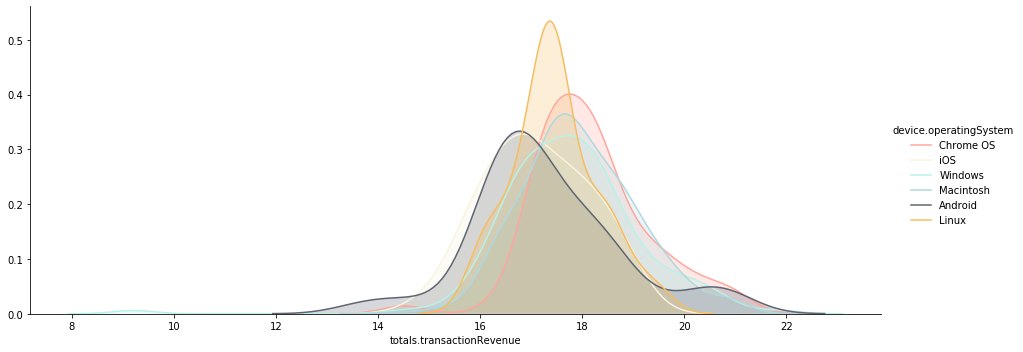

In [38]:
#distribution of transaction revenue of operating systems 
group = df_train[(df_train['device.operatingSystem'].isin\
         (df_train[df_train['totals.transactionRevenue'] > 0]['device.operatingSystem'].value_counts().reset_index()[:6]['index']))
        & (df_train['totals.transactionRevenue'] > 0)]

_ = sns.FacetGrid(group,
               hue='device.operatingSystem', height=5, aspect=2.5)\
  .map(sns.kdeplot, 'totals.transactionRevenue', shade=True)\
 .add_legend()

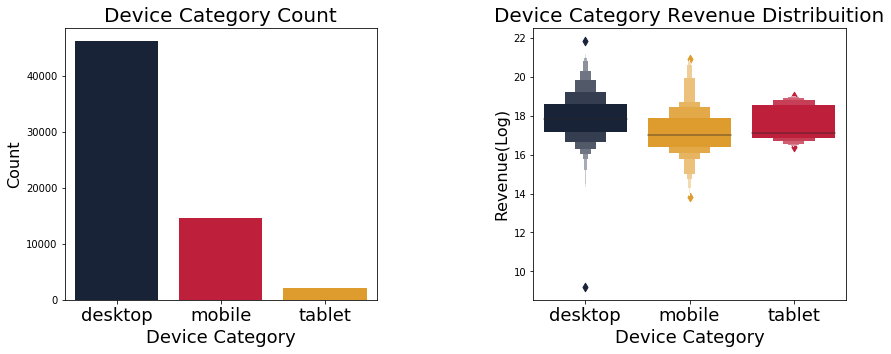

In [39]:
# seting the graph size
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.countplot(df_train["device.deviceCategory"], palette= ['#14213d','#d90429','#fca311']) 
plt.title("Device Category Count", fontsize=20) 
plt.xlabel("Device Category", fontsize=18) 
plt.ylabel("Count", fontsize=16) 
plt.xticks(fontsize=18) 

plt.subplot(1,2,2)
sns.boxenplot(x="device.deviceCategory", y = 'totals.transactionRevenue', 
              data=df_train[df_train['totals.transactionRevenue'] > 0], palette=['#14213d','#fca311','#d90429']) 
plt.title("Device Category Revenue Distribuition", fontsize=20) 
plt.xlabel("Device Category", fontsize=18) 
plt.ylabel("Revenue(Log)", fontsize=16) 
plt.xticks(fontsize=18)

plt.subplots_adjust(hspace = 0.9, wspace = 0.5)

plt.show()

In [40]:
group = df_train.groupby('device.deviceCategory').size().rename('Count').reset_index()
fig = px.pie(group, 
             values='Count', names='device.deviceCategory', 
             color_discrete_sequence=['#14213d','#fca311','#d90429'],
            title='Device Category',
            width=800,
            height=500)

fig.update_layout(
    margin=dict(l=25, r=20, t=30, b=50),
    width = 600,
    height = 400,
    paper_bgcolor="#ffffff",
)
fig.show()

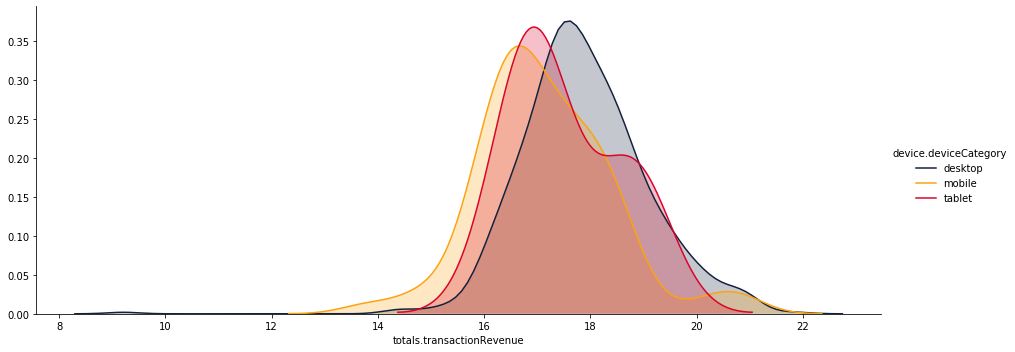

In [41]:
color = ['#14213d','#fca311','#d90429']

customPalette = sns.set_palette(sns.color_palette(color))

_ = sns.FacetGrid(df_train[df_train['totals.transactionRevenue'] > 0],
               hue='device.deviceCategory', height=5, aspect=2.5, palette=customPalette)\
  .map(sns.kdeplot, 'totals.transactionRevenue', shade=True)\
 .add_legend()

In [42]:
#continents 

df_train['geoNetwork.continent'].value_counts().reset_index()


,index,geoNetwork.continent
0,Americas,31435
1,Asia,15588
2,Europe,13798
3,Oceania,1056
4,Africa,1022
5,(not set),109


In [43]:
# visits/ revenue/ sales by day 

#seting some static color options
color_op = ['#5527A0', '#BB93D7', '#834CF7', '#6C941E', '#93EAEA', '#7425FF', '#F2098A', '#7E87AC', 
            '#EBE36F', '#7FD394', '#49C35D', '#3058EE', '#44FDCF', '#A38F85', '#C4CEE0', '#B63A05', 
            '#4856BF', '#F0DB1B', '#9FDBD9', '#B123AC']

# Visits by time train

# couting all entries by date to get number of visits by each date
dates_temp = df_train['date'].value_counts().reset_index().sort_values('index') 
# renaming the columns to apropriate names
dates_temp.columns = ['date','visits'] 

# creating the first trace with the necessary parameters
trace = go.Scatter(x=dates_temp.date.astype(str), y=dates_temp.visits,
                    opacity = 0.8, line = dict(color = '#38C788'), name= 'Visits by day')

# Below we will get the total values by Transaction Revenue Log by date
dates_temp_sum = df_train.groupby('date')['totals.transactionRevenue'].sum().reset_index()

# using the new dates_temp_sum we will create the second trace
trace1 = go.Scatter(x=dates_temp_sum.date.astype(str), line = dict(color = '#C73877'), name="RevenueLog by day",
                        y=dates_temp_sum['totals.transactionRevenue'], opacity = 0.8)

# Getting the total values by Transactions by each date
dates_temp_count = df_train[df_train['totals.transactionRevenue'] > 0].groupby('date')['totals.transactionRevenue'].count().reset_index()

# using the new dates_temp_count we will create the third trace
trace2 = go.Scatter(x=dates_temp_count.date.astype(str), line = dict(color = color_op[5]), name="Sellings by day",
                        y=dates_temp_count['totals.transactionRevenue'], opacity = 0.8)

#creating the layout the will allow us to give an title and 
# give us some interesting options to handle with the outputs of graphs
layout = dict(
    title= "Informations by Date",
    paper_bgcolor='#ffffff',
    template='plotly_white',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=3, label='3m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible = True),
        type='date'
    )
)

# creating figure with the both traces and layout
fig = dict(data= [trace, trace1, trace2], layout=layout)

#rendering the graphs
iplot(fig) #it's an equivalent to plt.show()

In [44]:
# hours of day when revenue is high 

pd.crosstab(df_train['visitHour'],
            df_train['weekday'], 
            values=df_train['totals.transactionRevenue'], 
            aggfunc='sum').style.background_gradient(cmap='viridis')

weekday,0,1,2,3,4,5,6
visitHour,,,,,,,
0,124.888501,51.626202,87.745750,17.868686,17.746748,0.000000,70.857279
1,52.081955,172.535815,73.489790,71.569988,69.093074,34.248427,70.664638
2,0.000000,37.477168,15.607270,71.593149,17.840684,0.000000,0.000000
3,17.375988,15.068274,38.337649,33.887475,17.962764,0.000000,18.787890
4,18.145717,14.727794,0.000000,0.000000,17.803383,0.000000,16.648136
5,0.000000,51.717357,16.453138,0.000000,16.116094,0.000000,0.000000
6,0.000000,0.000000,0.000000,18.215132,0.000000,0.000000,0.000000
7,33.514790,36.757172,0.000000,19.361469,18.939296,0.000000,0.000000
8,15.788202,16.992314,16.379690,50.106967,0.000000,18.557656,18.659540


In [45]:
# between 9AM - 7PM revenue is high 

In [46]:
#modeling

In [47]:
from sklearn.preprocessing import LabelEncoder

cat_columns = list(df_train.dtypes[df_train.dtypes == 'object'].reset_index()['index'])
num_columns = num_cols = ["totals.hits", "totals.pageviews", "visitNumber", "visitStartTime", 'totals.bounces',  'totals.newVisits'] 

for col in cat_columns:
    df_train[col] = LabelEncoder().fit_transform(df_train[col])

X = df_train[cat_columns + num_columns]
y = df_train['totals.transactionRevenue']

In [52]:
# pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [80]:
#https://lightgbm.readthedocs.io/en/latest/index.html
import lightgbm as lgb

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.01,
        "bagging_fraction" : 0.8,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }

lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_val = lgb.Dataset(X_test, label=y_test)


model = lgb.train(params, lgb_train, 1000, valid_sets=[lgb_val], early_stopping_rounds=200, verbose_eval=100)
    
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [82]:
y_pred[y_pred < 0] = 0
y_df = pd.DataFrame(data=y_pred, columns=['y_pred'])
y_df['y_test'] = y_test.values


from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_df['y_test'],y_df['y_pred']))